<a href="https://colab.research.google.com/github/MichelleThuo/MLInternshipTasks/blob/main/Task3%3ACuisineClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from collections import Counter

# Step 1: Data Loading and Data Preprocessing

In [2]:
# Load the dataset
data = pd.read_csv('Dataset .csv')

# Preprocess the dataset
# Display basic information about the dataset to understand its structure and missing values
print(data.info())
print(data.head())

# Handle missing values by dropping or forward filling them
# This is a simple approach where missing values are replaced with the last available value
data.fillna(method='ffill', inplace=True)  # Forward fill as an example

# Encode categorical variables
# Encode the target variable 'Cuisines' with LabelEncoder since it's categorical
# Assuming 'Cuisines' is the target column and others might be features
label_encoder = LabelEncoder()
data['Cuisines'] = label_encoder.fit_transform(data['Cuisines'])

# Identify categorical columns to encode if needed (for features)
categorical_cols = data.select_dtypes(include=['object']).columns

# Perform one-hot encoding on categorical features to convert them into numerical values if necessary
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

<ipython-input-2-3a8771daee3d>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill as an example


# Step 2: Split the data into training and testing sets

In [3]:
# Assuming 'Cuisines' is the target variable
X = data.drop('Cuisines', axis=1)  # Features
y = data['Cuisines']  # Target

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Select a classification algorithm and train the model

In [4]:
# Using Random Forest as a model for comparison
# classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
# random_forest_model.fit(X_train, y_train)

# Using Logistic Regression as a model for comparison
# Using StandardScaler to normalize features for Logistic Regression
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Logistic Regression model
classifier = LogisticRegression(max_iter=1000, random_state=42)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

# Step 4: Evaluate the model's performance

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

Accuracy: 0.2412349555206698
Precision: 0.21630504704663628
Recall: 0.2412349555206698

Classification Report:
                                                                                          precision    recall  f1-score   support

                                                                                American       0.04      0.20      0.07         5
                                                                 American, Asian, Burger       0.00      0.00      0.00         0
                                                      American, Asian, European, Seafood       0.00      0.00      0.00         1
                                                                           American, BBQ       0.00      0.00      0.00         1
                                                                   American, BBQ, Burger       0.00      0.00      0.00         1
                                                                 American, BBQ, Southern       0.00      0.0

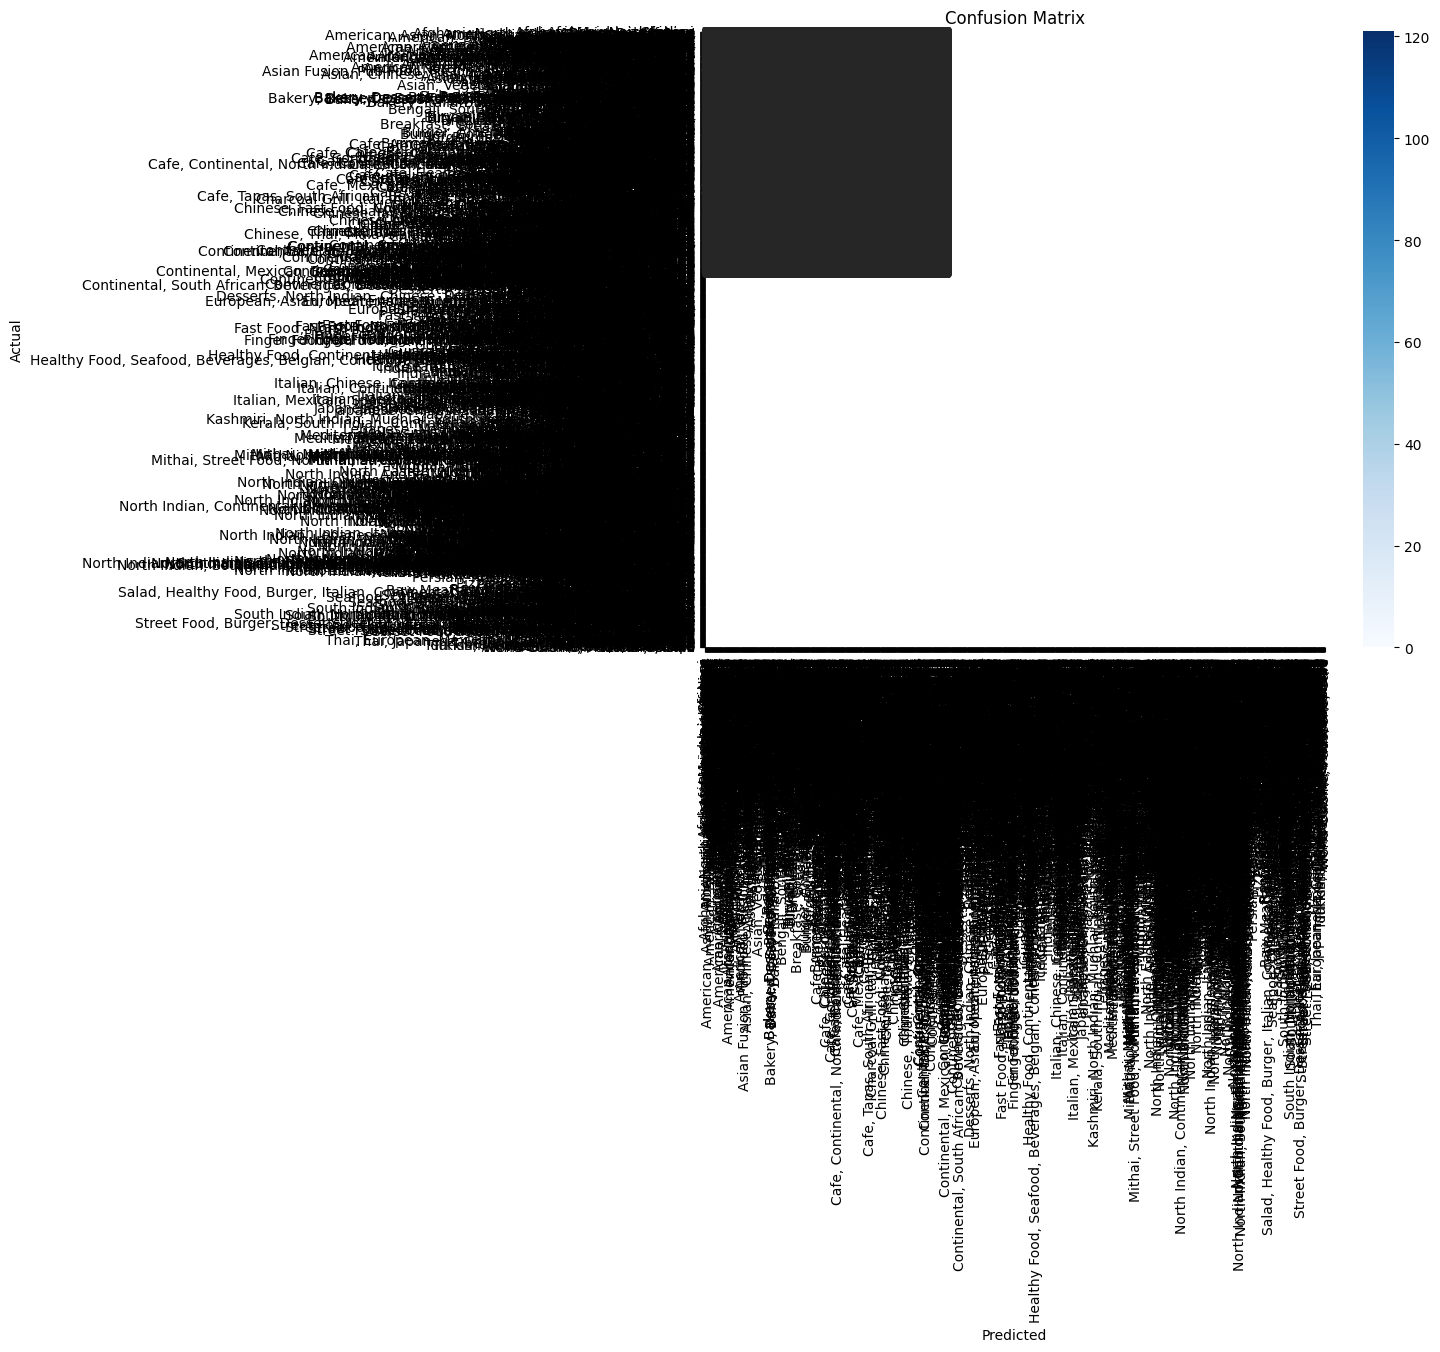

In [9]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

# Display a detailed classification report
print("\nClassification Report:")
# Get unique labels from y_test and y_pred
unique_labels = sorted(set(y_test) | set(y_pred))
# Filter target names based on unique labels
target_names = [label_encoder.classes_[i] for i in unique_labels if i < len(label_encoder.classes_)]
print(classification_report(y_test, y_pred, target_names=target_names, labels=unique_labels))
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 5: Analyze the model's performance across different cuisines

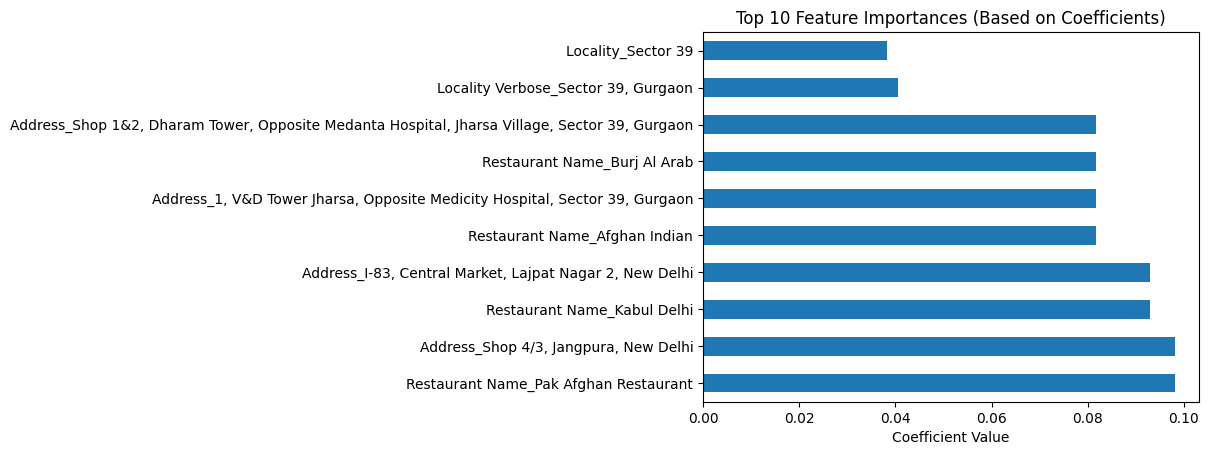

In [10]:
# Visualize feature importances for tree-based models RandomForest
# feature_importances = pd.Series(classifier.feature_importances_, index=X.columns)
# feature_importances.nlargest(10).plot(kind='barh')
# plt.title('Top 10 Feature Importances')
# plt.show()

# Analyze challenges or biases by checking the precision and recall per class
# class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
# class_df = pd.DataFrame(class_report).transpose()
# print("\nClass-wise Analysis:")
# print(class_df[['precision', 'recall']])


# Get feature importance using coefficients (Logistic regression)
feature_importances = pd.Series(classifier.coef_[0], index=X.columns)

# Visualize feature importances
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances (Based on Coefficients)')
plt.xlabel('Coefficient Value')
plt.show()

# Step 5: Analyze Model Performance

In [8]:
# Compare the models and why one was preferred over the other
print("Performance Comparison")
print("Logistic Regression is a simpler model that can work well with linearly separable data and is less prone to overfitting.")
print("Random Forest is a more complex ensemble model that can capture non-linear relationships but may be computationally more expensive.")

# Limitations
print("\nLimitations")
print("1. Handling missing values with forward fill may not be ideal for all columns; a more nuanced approach could improve data quality.")
print("2. Using default parameters for models may not provide the best performance. Hyperparameter tuning could improve results.")
print("3. Imbalance in class distribution for 'Cuisines' could affect model performance. Techniques like SMOTE could be considered for better results.")

# Future Improvements
print("\nFuture Improvements")
print("1. Use cross-validation for more reliable evaluation of model performance.")
print("2. Explore other models like Gradient Boosting or SVM for potential improvements.")
print("3. Conduct hyperparameter tuning using GridSearchCV for better model optimization.")

Performance Comparison
Logistic Regression is a simpler model that can work well with linearly separable data and is less prone to overfitting.
Random Forest is a more complex ensemble model that can capture non-linear relationships but may be computationally more expensive.

Limitations
1. Handling missing values with forward fill may not be ideal for all columns; a more nuanced approach could improve data quality.
2. Using default parameters for models may not provide the best performance. Hyperparameter tuning could improve results.
3. Imbalance in class distribution for 'Cuisines' could affect model performance. Techniques like SMOTE could be considered for better results.

Future Improvements
1. Use cross-validation for more reliable evaluation of model performance.
2. Explore other models like Gradient Boosting or SVM for potential improvements.
3. Conduct hyperparameter tuning using GridSearchCV for better model optimization.


# Project Workflow Overview
## 1. Data Preprocessing
- Loading & Cleaning: Dataset loaded and missing values handled using forward fill, which is a simple approach but may not be ideal in all cases.

- Encoding Categorical Data: Used LabelEncoder for the target variable ('Cuisines') and one-hot encoding for other categorical features.
- Splitting the Data: Divided into training (80%) and testing (20%) sets.

## 2. Model Comparison
- Logistic Regression: Chosen as the primary model due to its simplicity, memory efficiency, and suitability for the environment. It works well with linearly separable data and helps in understanding feature impacts.
- Random Forest (Commented Out): Considered for its ability to capture non-linear relationships but not used due to memory constraints.
Model Evaluation:

## 3. Performance Metrics
- Calculated accuracy, precision, and recall to assess the model’s predictions. Included a classification report and confusion matrix for a detailed view.
- Confusion Matrix Analysis:
 - Limitation: Visualization is cluttered due to many unique classes, making it hard to derive actionable insights.
 - Class Imbalance: Uneven distribution of cuisine classes could affect the model’s accuracy for underrepresented classes.

## 4. Model Selection Rationale
- Logistic Regression: Chosen due to its lower memory requirements, ensuring smooth execution on the available hardware. Random Forest could potentially yield better results with more memory, but it was not feasible for this environment.

## 5. Key Explanations
- Handling Missing Data: Forward fill method is quick but not necessarily optimal; a more sophisticated approach could yield better results.
- Model Choice: Logistic Regression provides interpretability, while Random Forest offers robustness but at a higher computational cost.
- Metrics Analysis: Metrics like accuracy, precision, and recall are used to measure model effectiveness, with a focus on the balance between false positives and false negatives.

## 6. Limitations & Future Improvements
- Handling Missing Data: Explore more nuanced imputation methods.
- Hyperparameter Tuning: Use GridSearchCV for optimizing model performance.
- Class Imbalance: Apply techniques like SMOTE to improve the model's ability to classify less frequent cuisine types.
- Cross-Validation: Implement cross-validation for a more reliable evaluation of performance.
- Interactive Visualizations: Use tools like Plotly for a more user-friendly examination of confusion matrices.